In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('dataset/transfers_complete.csv')
original_data = df
df

,league,season,window,team_id,team_name,team_country,dir,player_id,player_name,player_age,...,counter_team_id,counter_team_name,counter_team_country,transfer_fee_amnt,market_val_amnt,is_free,is_loan,is_loan_end,is_retired,transfer_id
0,GB1,2009,s,985,Manchester United,England,in,33544,Antonio Valencia,23.0,...,1071,Wigan Athletic,England,18800000.0,NaN,False,False,False,False,310832
1,GB1,2009,s,985,Manchester United,England,in,62049,Mame Diouf,21.0,...,687,Molde FK,Norway,4500000.0,1600000.0,False,False,False,False,319841
2,GB1,2009,s,985,Manchester United,England,in,43261,Gabriel Obertan,20.0,...,40,FC Girondins Bordeaux,France,4000000.0,400000.0,False,False,False,False,315185
3,GB1,2009,s,985,Manchester United,England,in,1397,Michael Owen,29.0,...,762,Newcastle United,England,0.0,NaN,True,False,False,False,306421
4,GB1,2009,s,985,Manchester United,England,in,73538,Scott Moffatt,18.0,...,5242,Manchester United U18,England,NaN,NaN,False,False,False,False,339015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82377,NL1,2024,s,724,FC Volendam,Belgium,left,1014243,Vivaldo Semedo,19.0,...,410,Udinese Calcio,Italy,NaN,500.0,False,True,True,False,4844834
82378,NL1,2024,s,724,FC Volendam,Belgium,left,925584,Axel Guessand,19.0,...,410,Udinese Calcio,Italy,NaN,500.0,False,True,True,False,4832825
82379,NL1,2024,s,724,FC Volendam,Belgium,left,746838,Zach Booth,20.0,...,39341,Leicester City U21,England,NaN,500.0,False,True,True,False,4623166
82380,NL1,2024,s,724,FC Volendam,Belgium,left,967948,Garang Kuol,19.0,...,762,Newcastle United,England,NaN,700.0,False,True,True,False,4569682


In [4]:
df = df[df["is_free"] == False]
df = df[df["is_loan"] == False]
df = df[df["is_loan_end"] == False]
df = df[df["is_retired"] == False]

df["transfer_fee_amnt"] = df["transfer_fee_amnt"].fillna(0)
df["season_ord"] = df.apply(lambda row: row["season"] + 0.1 if row['window']=="w" else row["season"] + 0.2, axis=1)

df

,league,season,window,team_id,team_name,team_country,dir,player_id,player_name,player_age,...,counter_team_name,counter_team_country,transfer_fee_amnt,market_val_amnt,is_free,is_loan,is_loan_end,is_retired,transfer_id,season_ord
0,GB1,2009,s,985,Manchester United,England,in,33544,Antonio Valencia,23.0,...,Wigan Athletic,England,18800000.0,NaN,False,False,False,False,310832,2009.2
1,GB1,2009,s,985,Manchester United,England,in,62049,Mame Diouf,21.0,...,Molde FK,Norway,4500000.0,1600000.0,False,False,False,False,319841,2009.2
2,GB1,2009,s,985,Manchester United,England,in,43261,Gabriel Obertan,20.0,...,FC Girondins Bordeaux,France,4000000.0,400000.0,False,False,False,False,315185,2009.2
4,GB1,2009,s,985,Manchester United,England,in,73538,Scott Moffatt,18.0,...,Manchester United U18,England,0.0,NaN,False,False,False,False,339015,2009.2
12,GB1,2009,s,985,Manchester United,England,left,8198,Cristiano Ronaldo,24.0,...,Real Madrid,Spain,94000000.0,45000000.0,False,False,False,False,308498,2009.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82371,NL1,2024,s,724,FC Volendam,Belgium,left,672100,Darius Johnson,24.0,...,Without Club,Without Club,0.0,250.0,False,False,False,False,4958717,2024.2
82372,NL1,2024,s,724,FC Volendam,Belgium,left,508642,Ibrahim El Kadiri,22.0,...,Without Club,Without Club,0.0,300.0,False,False,False,False,4958716,2024.2
82373,NL1,2024,s,724,FC Volendam,Belgium,left,638666,Josh Flint,23.0,...,Without Club,Without Club,0.0,450.0,False,False,False,False,4958707,2024.2
82374,NL1,2024,s,724,FC Volendam,Belgium,left,474838,Brian Plat,24.0,...,Without Club,Without Club,0.0,600.0,False,False,False,False,4958706,2024.2


In [5]:
to_keep = ['team_name', 'player_id', 'transfer_fee_amnt', 'season', 'season_ord', 'window']

in_tr = df[df["dir"]=="in"][to_keep]
left_tr = df[df["dir"]=="left"][to_keep]

in_tr = in_tr.rename(columns={"transfer_fee_amnt": "arrival_fee_amnt"})

In [6]:
merged_df = pd.merge(left_tr, in_tr, on=['team_name', 'player_id'], how='left', suffixes=["_left", "_in"])
merged_df = merged_df.dropna()
merged_df

,team_name,player_id,transfer_fee_amnt,season_left,season_ord_left,window_left,arrival_fee_amnt,season_in,season_ord_in,window_in
0,Manchester United,8198,94000000.0,2009,2009.2,s,15000000.0,2021.0,2021.2,s
25,Tottenham Hotspur,57488,0.0,2009,2009.2,s,0.0,2010.0,2010.1,w
28,West Ham United,12691,5700000.0,2009,2009.2,s,3200000.0,2012.0,2012.2,s
79,Everton FC,3826,840000.0,2009,2009.1,w,0.0,2009.0,2009.2,s
82,Fulham FC,61723,0.0,2009,2009.1,w,0.0,2009.0,2009.2,s
...,...,...,...,...,...,...,...,...,...,...
11866,NEC Nijmegen,694039,0.0,2024,2024.2,s,0.0,2022.0,2022.2,s
11867,Sparta Rotterdam,593824,0.0,2024,2024.2,s,0.0,2022.0,2022.2,s
11868,Sparta Rotterdam,159143,0.0,2024,2024.2,s,0.0,2022.0,2022.2,s
11871,FC Utrecht,369552,0.0,2024,2024.2,s,1250000.0,2022.0,2022.2,s


In [7]:
merged_df = merged_df[merged_df["season_ord_left"]>merged_df["season_ord_in"]]

merged_df["gain"] = merged_df["transfer_fee_amnt"] - merged_df["arrival_fee_amnt"]

merged_df

C:\Users\satri\AppData\Local\Temp\ipykernel_2524\3990958540.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df["gain"] = merged_df["transfer_fee_amnt"] - merged_df["arrival_fee_amnt"]


,team_name,player_id,transfer_fee_amnt,season_left,season_ord_left,window_left,arrival_fee_amnt,season_in,season_ord_in,window_in,gain
102,Wigan Athletic,12807,1200000.0,2010,2010.2,s,2300000.0,2009.0,2009.2,s,-1100000.0
108,Manchester United,73538,0.0,2010,2010.2,s,0.0,2009.0,2009.2,s,0.0
122,Wolverhampton Wanderers,29975,1680000.0,2010,2010.2,s,1400000.0,2009.0,2009.2,s,280000.0
130,West Ham United,23197,2200000.0,2010,2010.2,s,6800000.0,2009.0,2009.2,s,-4600000.0
131,West Ham United,66109,750000.0,2010,2010.2,s,1200000.0,2009.0,2009.2,s,-450000.0
...,...,...,...,...,...,...,...,...,...,...,...
11866,NEC Nijmegen,694039,0.0,2024,2024.2,s,0.0,2022.0,2022.2,s,0.0
11867,Sparta Rotterdam,593824,0.0,2024,2024.2,s,0.0,2022.0,2022.2,s,0.0
11868,Sparta Rotterdam,159143,0.0,2024,2024.2,s,0.0,2022.0,2022.2,s,0.0
11871,FC Utrecht,369552,0.0,2024,2024.2,s,1250000.0,2022.0,2022.2,s,-1250000.0


**SEASON 2016**

In [8]:
df_16 = merged_df[merged_df["season_left"]==2016]
df_16

,team_name,player_id,transfer_fee_amnt,season_left,season_ord_left,window_left,arrival_fee_amnt,season_in,season_ord_in,window_in,gain
684,Leicester City,225083,35800000.0,2016,2016.2,s,9000000.0,2015.0,2015.2,s,26800000.0
685,Leicester City,46580,11000000.0,2016,2016.2,s,9000000.0,2014.0,2014.1,w,2000000.0
688,Arsenal FC,159471,5000000.0,2016,2016.2,s,0.0,2013.0,2013.2,s,5000000.0
689,Arsenal FC,121990,3000000.0,2016,2016.2,s,4000000.0,2010.0,2010.1,w,-1000000.0
691,Tottenham Hotspur,61834,15400000.0,2016,2016.2,s,0.0,2009.0,2009.2,s,15400000.0
...,...,...,...,...,...,...,...,...,...,...,...
11222,FC Groningen,43228,435000.0,2016,2016.1,w,225000.0,2014.0,2014.1,w,210000.0
11223,Vitesse Arnhem,110911,750000.0,2016,2016.1,w,750000.0,2015.0,2015.1,w,0.0
11224,Vitesse Arnhem,58342,400000.0,2016,2016.1,w,400000.0,2015.0,2015.2,s,0.0
11225,SC Heerenveen,169362,250000.0,2016,2016.1,w,700000.0,2015.0,2015.2,s,-450000.0


In [9]:
df_16 = df_16[["team_name", "gain"]]
df_16 = pd.DataFrame(df_16.groupby("team_name")["gain"].sum().sort_values(ascending=False))
df_16


,gain
team_name,
SL Benfica,102450000.0
Valencia CF,84650000.0
Borussia Dortmund,66800000.0
Ajax Amsterdam,63270000.0
Sporting CP,61930000.0
...,...
Paris Saint-Germain,-13300000.0
Juventus FC,-16859000.0
ACF Fiorentina,-19500000.0


(0.0, 110000000.0)

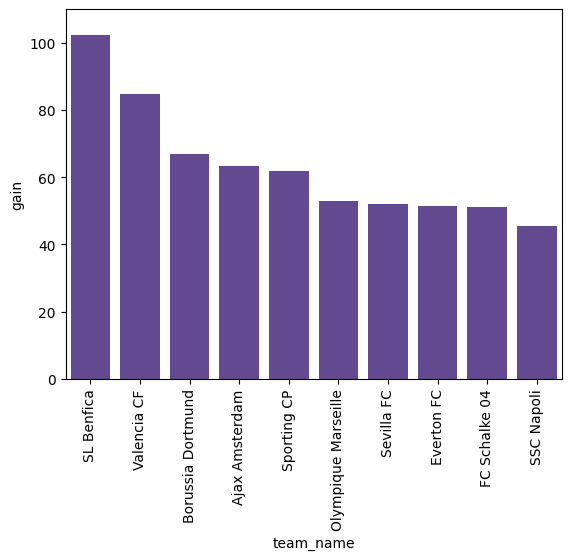

In [ ]:
sns.barplot(data=df_16[:10], x="team_name", y="gain", color="#5f3e9c")
plt.xticks(rotation=90)
plt.yticks([0, 20000000, 40000000, 60000000, 80000000, 100000000], ['0', '20', '40', '60', '80', '100'])
plt.ylim(0, 110_000_000)

In [10]:
print("Total Capital Gain 2016",df_16["gain"].sum())

Total Capital Gain 2016 1256815000.0


Plusvalenze anno per anno

C:\Users\satri\AppData\Local\Temp\ipykernel_2524\4184223652.py:17: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(0, max_gain)


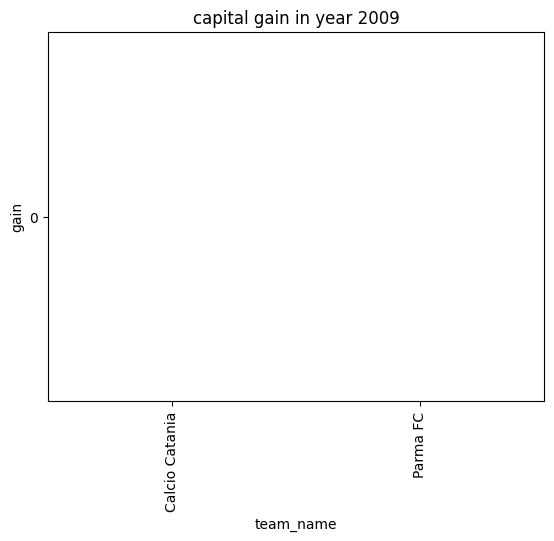

Total Capital Gain 2009 0.0


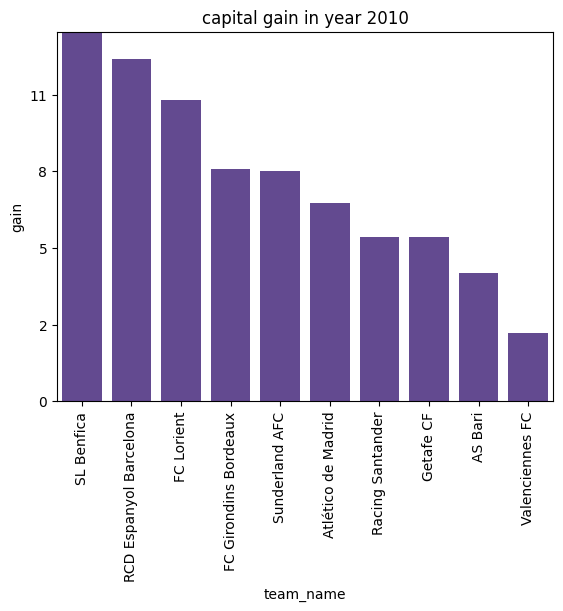

Total Capital Gain 2010 29410050.0


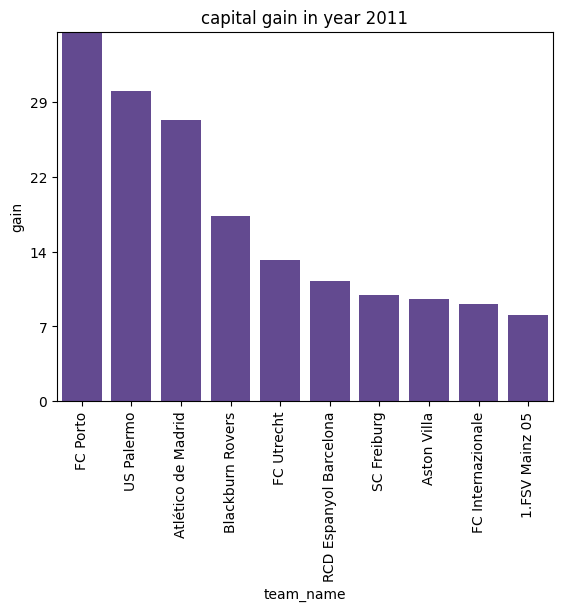

Total Capital Gain 2011 142973500.0


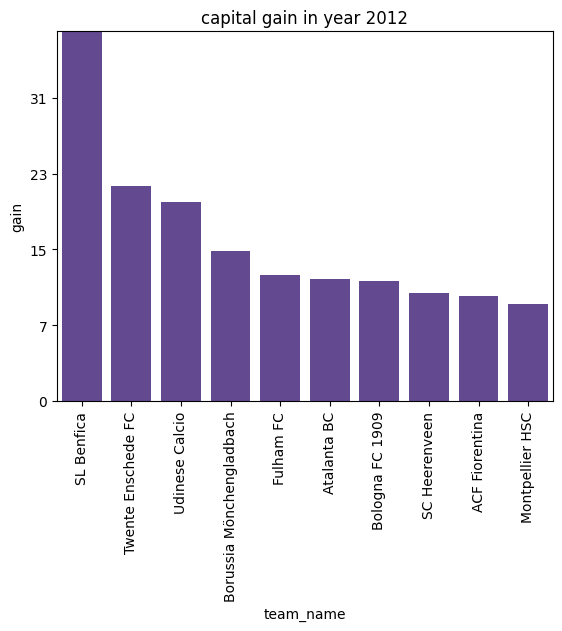

Total Capital Gain 2012 137922500.0


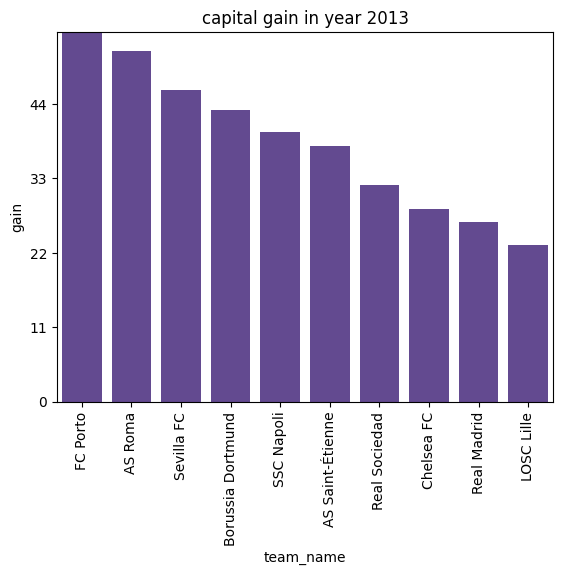

Total Capital Gain 2013 505207500.0


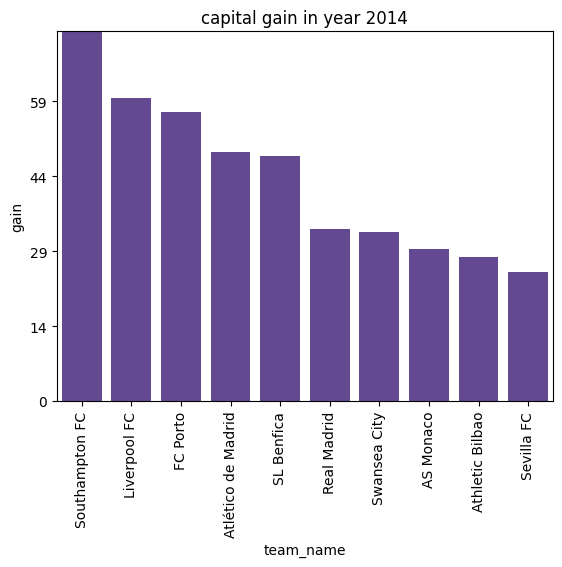

Total Capital Gain 2014 696176500.0


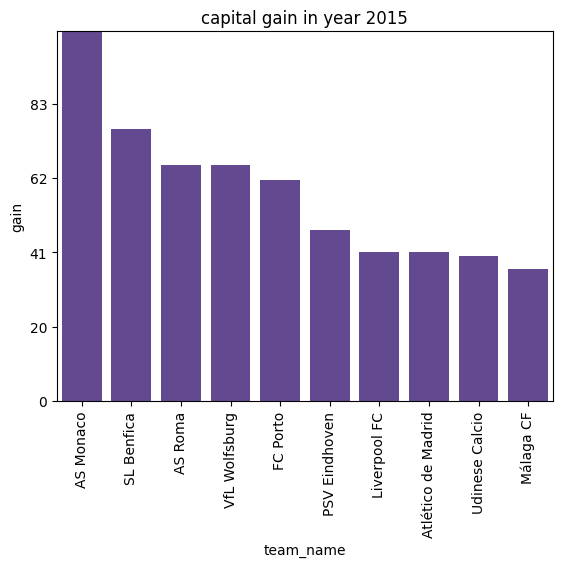

Total Capital Gain 2015 1100172000.0


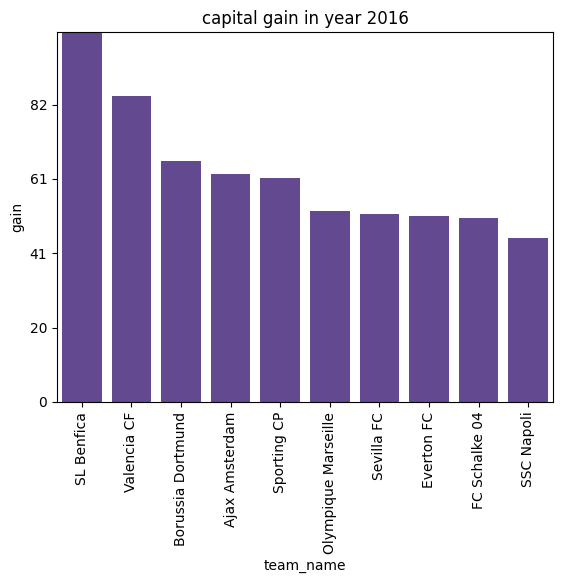

Total Capital Gain 2016 1256815000.0


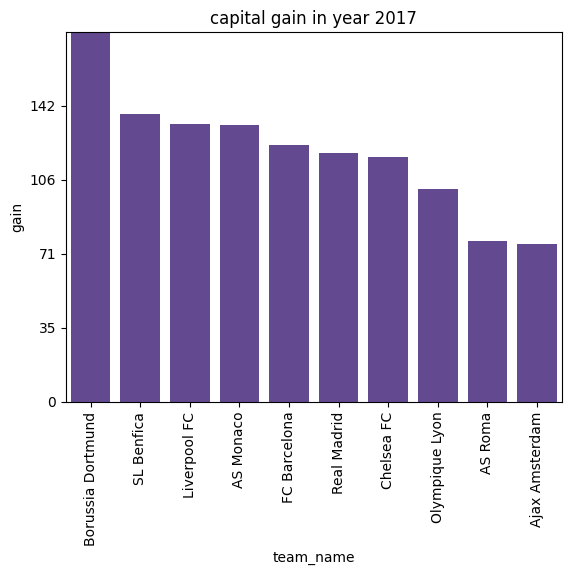

Total Capital Gain 2017 2555570000.0


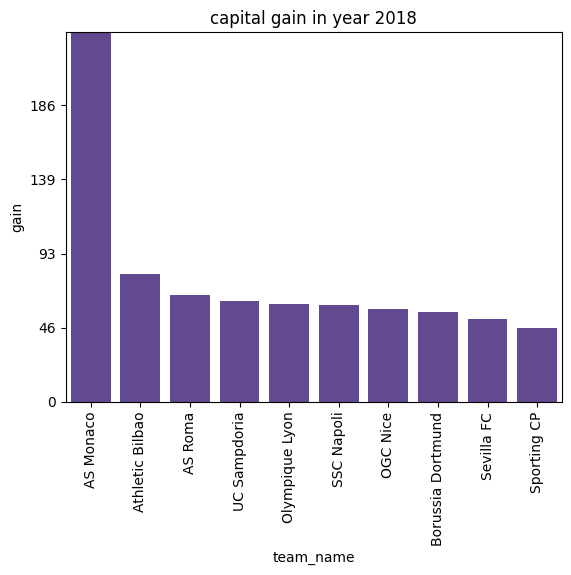

Total Capital Gain 2018 1733324000.0


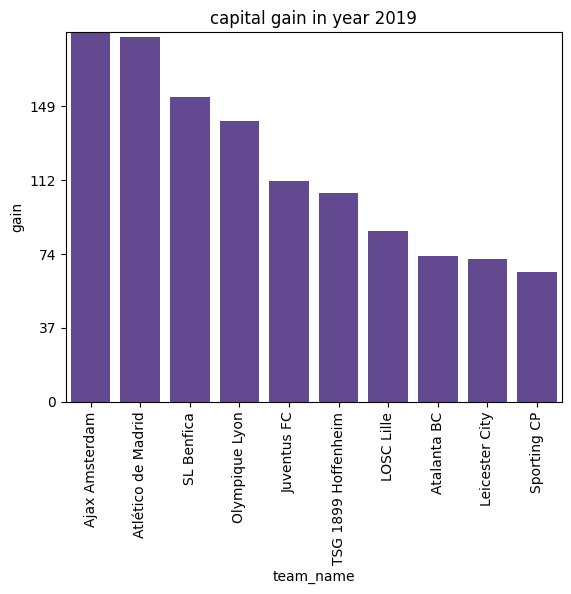

Total Capital Gain 2019 2406805100.0


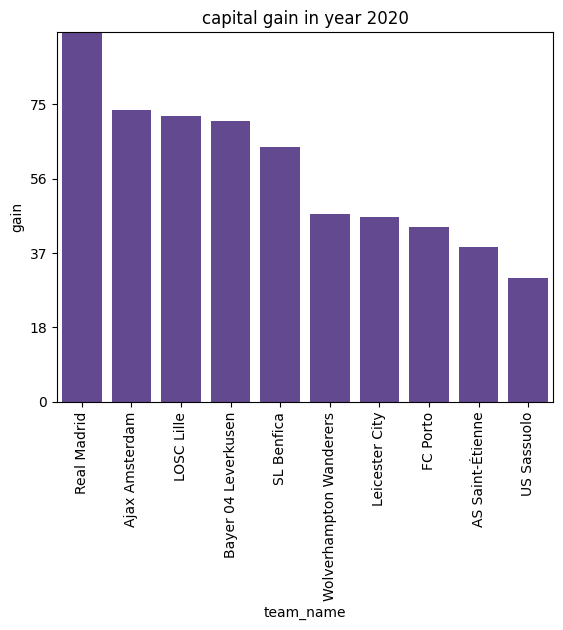

Total Capital Gain 2020 631661000.0


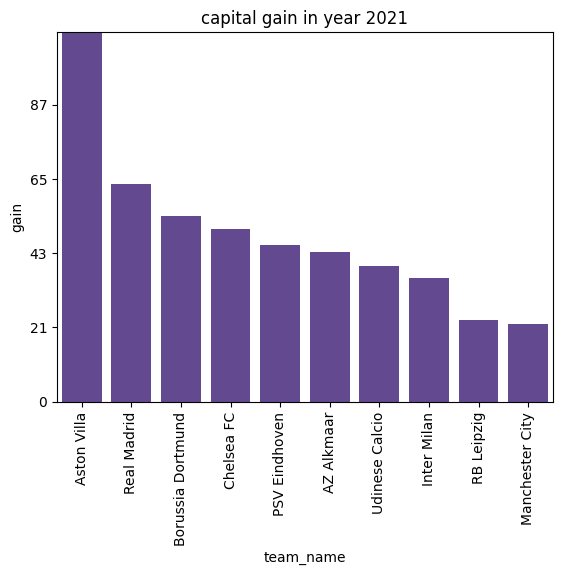

Total Capital Gain 2021 390635000.0


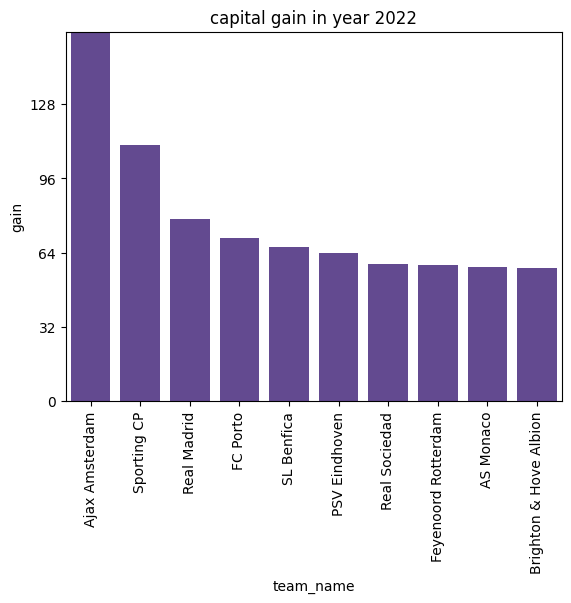

Total Capital Gain 2022 931078237.0


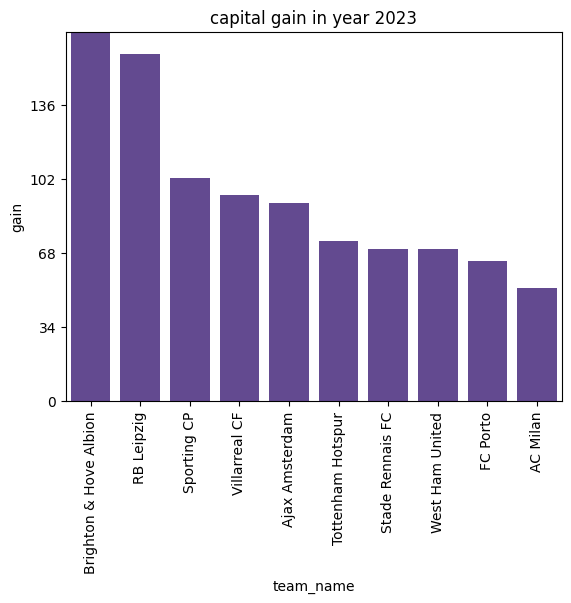

Total Capital Gain 2023 1146350782.0


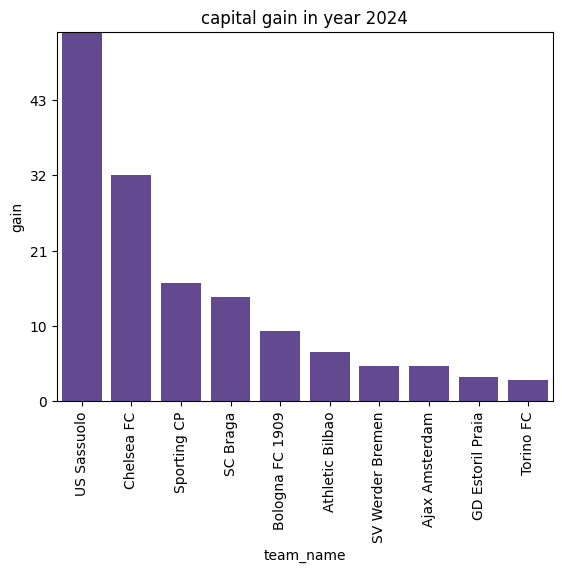

Total Capital Gain 2024 1490730.0
{2009: 0.0, 2010: 29410050.0, 2011: 142973500.0, 2012: 137922500.0, 2013: 505207500.0, 2014: 696176500.0, 2015: 1100172000.0, 2016: 1256815000.0, 2017: 2555570000.0, 2018: 1733324000.0, 2019: 2406805100.0, 2020: 631661000.0, 2021: 390635000.0, 2022: 931078237.0, 2023: 1146350782.0, 2024: 1490730.0}


In [14]:
years_list = list(range(2009, 2025))
dict_gains = {}

for y in years_list:
    df_m = merged_df[merged_df["season_left"]==y]
    df_m = df_m[["team_name", "gain"]]
    df_m = pd.DataFrame(df_m.groupby("team_name")["gain"].sum().sort_values(ascending=False))
    max_gain = df_m["gain"].max()
    y_limit = (max_gain // 1_000_000 + 1) * 1_000_000

    sns.barplot(data=df_m[:10], x="team_name", y="gain", color="#5f3e9c")
    plt.xticks(rotation=90)
    plt.yticks(
        [i * y_limit / 5 for i in range(6)], 
        [str(int(i * y_limit / 5 / 1_000_000)) for i in range(6)]
    )
    plt.ylim(0, max_gain)
    plt.title(f"capital gain in year {y}")
    plt.show()
    gain_m = df_m["gain"].sum()
    print(f"Total Capital Gain {y}",gain_m)
    dict_gains[y] = gain_m

print(dict_gains)
    

Crescita annua delle plusvalenze

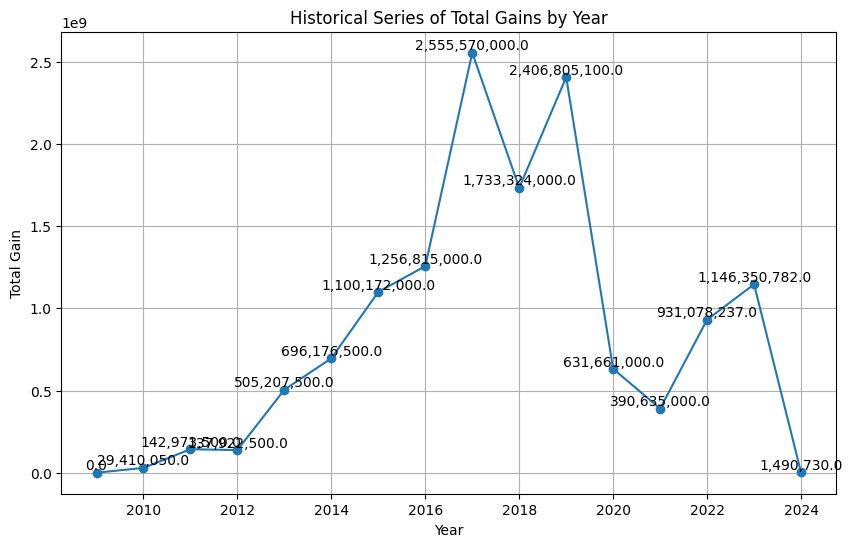

In [16]:
df_gain = pd.DataFrame(list(dict_gains.items()), columns=['Year', 'Total Gain'])

df_gain = df_gain.sort_values('Year')

plt.figure(figsize=(10, 6))
plt.plot(df_gain['Year'], df_gain['Total Gain'], marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Total Gain')
plt.title('Historical Series of Total Gains by Year')
plt.grid(True)


for i in range(len(df_gain)):
    plt.text(df_gain['Year'].iloc[i], df_gain['Total Gain'].iloc[i], f"{df_gain['Total Gain'].iloc[i]:,}", ha='center', va='bottom')

plt.show()